# Data Mining using Python 
> Required for Big Data Technologies (ITS66904) Assignment 1

Dataset available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

The Online Retail II dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

## Import libraries 

I'll be using the following libraries for this notebook. 

1. **Pandas**: For data manipulation and analysis.
2. **NumPy**: For numerical computations.
3. **Scikit-learn**: For machine learning and data mining algorithms.
4. **Matplotlib** and **Seaborn**: For data visualization.

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Read the dataset

The Online Retail II dataset is in the `xlsx` file format. Since, reading `xlsx` files are very slow, we can read it once and convert it into a pickle for reading it next time. Converting the dataset into a pickle isn't necessary but can be helpful when read times are very high.

In [2]:
dataset_folder = "./dataset/online+retail+ii/"
try:
    df = pd.read_pickle(f"{dataset_folder}/online_retail_ii.pickle")
except:
    df = pd.read_excel(f"{dataset_folder}/online_retail_II.xlsx", engine="openpyxl")
    df.to_pickle(f"{dataset_folder}/online_retail_ii.pickle")

In [3]:
df.shape

(525461, 8)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Preprocessing
These just include renaming the columns, removing null values, adding columns for ease, and so on...

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
new_columns = {
    "Invoice": "invoice",
    "StockCode": "stock_code",
    "Description": "description", 
    "Quantity": "quantity",
    "InvoiceDate": "invoice_date", 
    "Price": "price", 
    "Customer ID": "customer_id", 
    "Country": "country"
}

df = df.rename(columns=new_columns)

In [9]:
df

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


We only have null values on the columns `description` and `customer_id`.

In [10]:
# only see records where customer_id is null
df[df["customer_id"].isna()] 

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [11]:
# where quantity is negative
df.loc[df['quantity'] < 0]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [12]:
df.loc[df['customer_id'] == 16321]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
187,489450,22087,PAPER BUNTING WHITE LACE,12,2009-12-01 10:36:00,2.95,16321.0,Australia


Negative quantities just mean that the items were returned.

In [13]:
purchases = df[df['quantity'] > 0]
returns = df[df['quantity'] < 0]

In [14]:
df[df['customer_id'].isna()]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [15]:
df.loc[df['invoice'] == 489525]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom


In [16]:
df.loc[df['invoice'] == 489464]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom


### Handling null values

In [17]:
df.isna().sum()

invoice              0
stock_code           0
description       2928
quantity             0
invoice_date         0
price                0
customer_id     107927
country              0
dtype: int64

In [18]:
null_customer_transactions = df[df['customer_id'].isnull()]
null_customer_transactions.insert(loc=8, column='total_amount', value=null_customer_transactions['quantity'] * null_customer_transactions['price'])
print(null_customer_transactions['invoice'].nunique())
print(null_customer_transactions['total_amount'].sum())
print(null_customer_transactions['invoice_date'].min())
print(null_customer_transactions['invoice_date'].max())

5229
1191276.0599999998
2009-12-01 10:52:00
2010-12-09 17:25:00


In [19]:
total_transactions = df.shape[0]
null_customer_percentage = (107927 / total_transactions) * 100
print(f"Percentage of transactions with null customer IDs: {null_customer_percentage:.2f}%")

Percentage of transactions with null customer IDs: 20.54%


Dropping rows with null `customer_id` would lose us a substantial amount of data. So, instead these could be filled out with something like "GUEST". Because unknown `customer_id` could also indicate in-store purchases, guest checkouts or data collection issue. Regardless, it is still data important for the retailer.

In [20]:
df['customer_id'] = df['customer_id'].fillna("GUEST")

df_known_customers = df.loc[df['customer_id'] != "GUEST"]
df_guest = df.loc[df['customer_id'] == "GUEST"]

In [21]:
df_known_customers

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
df_guest

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,GUEST,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,GUEST,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,GUEST,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,GUEST,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,GUEST,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,GUEST,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,GUEST,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,GUEST,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,GUEST,United Kingdom


### Purchases and Returns
We also realized that there were values in the `quantity` column which were negative. Those values simply indicated item returns

In [23]:
df[df['quantity'] < 0]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,GUEST,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,GUEST,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,GUEST,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,GUEST,United Kingdom


In [24]:
purchases.insert(loc=8, column='total_value', value=purchases['quantity'] * purchases['price'])
returns.insert(loc=8, column='total_value', value=returns['quantity'] * returns['price'])

In [25]:
purchases.head(10)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [26]:
returns.head(25)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_value
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,-15.00
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,-15.00
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia,-20.40
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom,-12.75


## Visualize data

In [27]:
df.columns

Index(['invoice', 'stock_code', 'description', 'quantity', 'invoice_date',
       'price', 'customer_id', 'country'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       525461 non-null  object        
 1   stock_code    525461 non-null  object        
 2   description   522533 non-null  object        
 3   quantity      525461 non-null  int64         
 4   invoice_date  525461 non-null  datetime64[ns]
 5   price         525461 non-null  float64       
 6   customer_id   525461 non-null  object        
 7   country       525461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.1+ MB


In [29]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df = df.set_index('invoice_date')
print(df.index)

DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:46:00', '2009-12-01 07:46:00',
               ...
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00'],
              dtype='datetime64[ns]', name='invoice_date', length=525461, freq=None)


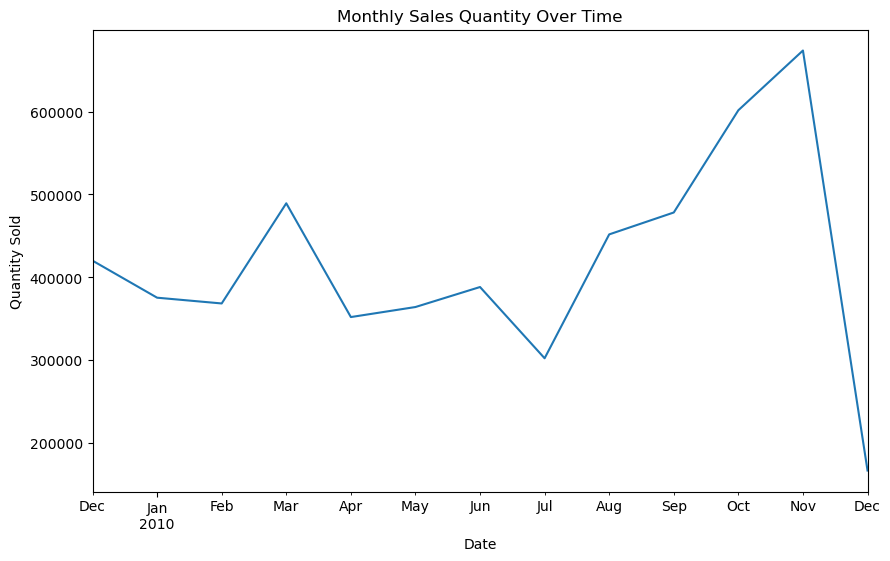

In [30]:
monthly_sales = df['quantity'].resample('ME').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Quantity Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

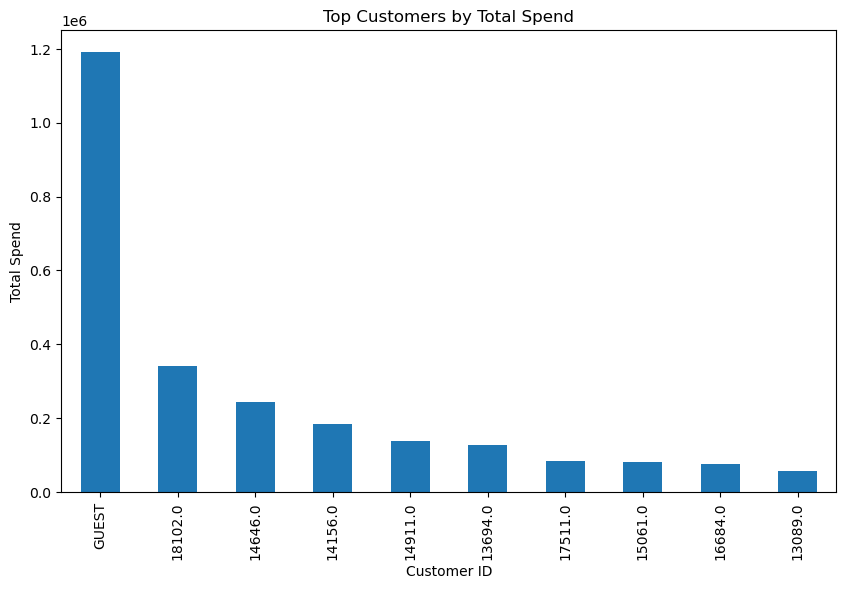

In [31]:
df['total_spend'] = df['quantity'] * df['price']
top_customers = df.groupby('customer_id')['total_spend'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title("Top Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

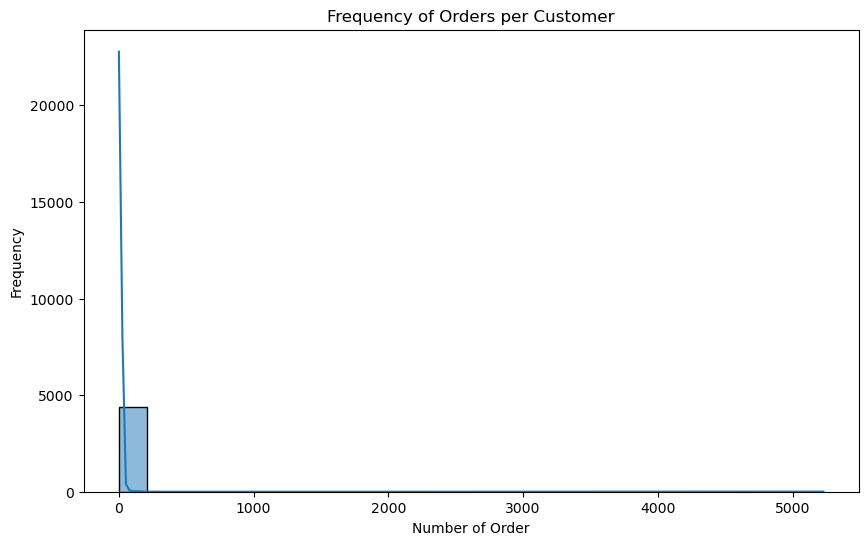

In [32]:
order_counts = df.groupby('customer_id')['invoice'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=25, kde=True)
plt.title("Frequency of Orders per Customer")
plt.xlabel("Number of Order")
plt.ylabel("Frequency")
plt.show()

## Analyze Purchases and Returns
Since, the dataset includes negative quantities (which mean item returns), we can gain valuable insights by analyzing purchases and returns.

In [33]:
def calculate_return_rate(group):
    returns = abs(group[group < 0].sum())
    purchases = group[group > 0].sum()
    if purchases > 0:
        return returns / (returns + purchases)
    elif returns > 0:
        return 1.0  # All returns, no purchases
    else:
        return 0.0

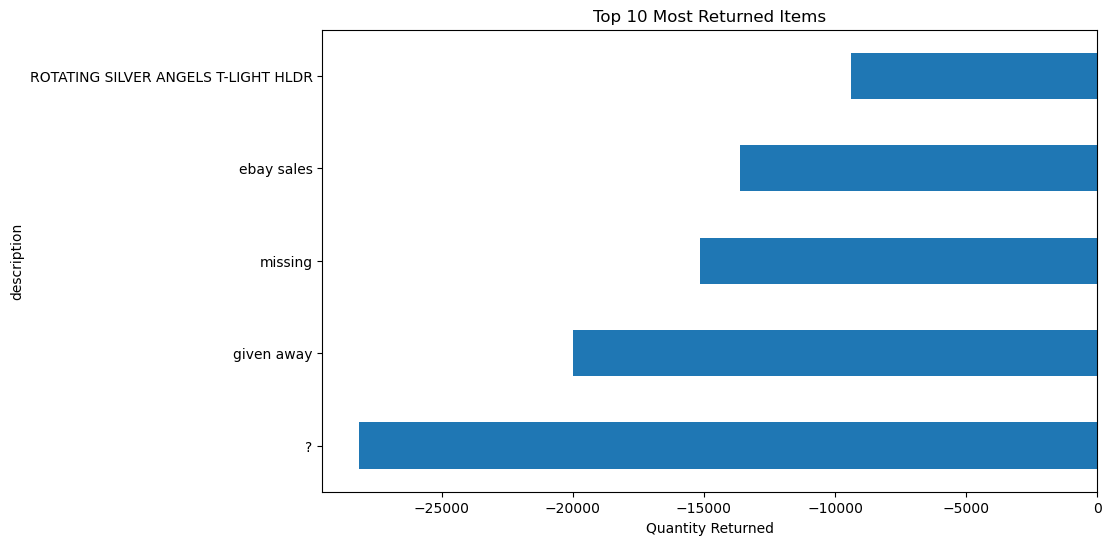

In [34]:
top_returned = returns.groupby("description")['quantity'].sum().sort_values().head()

return_rate = df.groupby('stock_code').agg({
    'quantity': calculate_return_rate
}).sort_values('quantity', ascending=False)

plt.figure(figsize=(10, 6))
top_returned.plot(kind='barh')
plt.title('Top 10 Most Returned Items')
plt.xlabel("Quantity Returned")
plt.show()

### Customer Behavior with Returns

In [35]:
customer_return_rate = df.groupby('customer_id').agg({
    'quantity': calculate_return_rate
}).sort_values('quantity', ascending=False)

print("Customers with highest return rates:")
print(customer_return_rate.head(10))

Customers with highest return rates:
             quantity
customer_id          
12590.0           1.0
13409.0           1.0
15935.0           1.0
15940.0           1.0
13401.0           1.0
13378.0           1.0
15997.0           1.0
13365.0           1.0
13353.0           1.0
13342.0           1.0


In [36]:
def calculate_return_purchase_ratios(df):
    # Group by customer_id and calculate returns and purchases
    grouped = df.groupby('customer_id')['quantity'].agg([
        ('returns', lambda x: abs(x[x < 0].sum())),
        ('purchases', lambda x: x[x > 0].sum())
    ])
    
    grouped['return_purchase_ratio'] = grouped['returns'] / grouped['purchases'].replace(0, np.inf)
    
    # Replace inf with 0 (cases where purchases were 0)
    grouped['return_purchase_ratio'] = grouped['return_purchase_ratio'].replace(np.inf, 0)
    
    return grouped['return_purchase_ratio']

return_purchase_ratios = calculate_return_purchase_ratios(df)

df = df.reset_index().merge(return_purchase_ratios, on='customer_id', how='left').set_index('invoice_date')

In [37]:
df

,invoice,stock_code,description,quantity,price,customer_id,country,total_spend,return_purchase_ratio
invoice_date,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,0.001374
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,0.001374
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,0.001374
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,0.001374
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,0.001374
...,...,...,...,...,...,...,...,...,...
2010-12-09 20:01:00,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom,5.90,0.002278
2010-12-09 20:01:00,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom,3.75,0.002278
2010-12-09 20:01:00,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom,3.75,0.002278


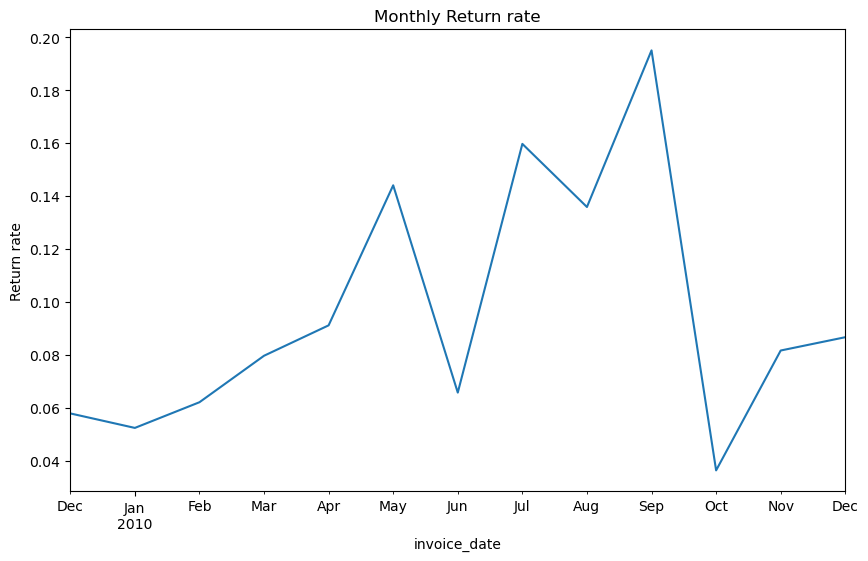

In [38]:
monthly_return_rate = df.resample("ME").agg({
    'quantity': lambda x: abs(x[x < 0].sum()) / x[x > 0].sum()
})

plt.figure(figsize=(10, 6))
monthly_return_rate['quantity'].plot()
plt.title("Monthly Return rate")
plt.ylabel("Return rate")
plt.show()

## Data Mining Algorithms

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525461 entries, 2009-12-01 07:45:00 to 2010-12-09 20:01:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   invoice                525461 non-null  object 
 1   stock_code             525461 non-null  object 
 2   description            522533 non-null  object 
 3   quantity               525461 non-null  int64  
 4   price                  525461 non-null  float64
 5   customer_id            525461 non-null  object 
 6   country                525461 non-null  object 
 7   total_spend            525461 non-null  float64
 8   return_purchase_ratio  525461 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 40.1+ MB


In [40]:
df['total_amount'] = df['quantity'] * df['price']

In [49]:
df_rfm = df.reset_index()

df_rfm = df_rfm.groupby('customer_id').agg({
    'invoice_date': lambda x: (df_rfm['invoice_date'].max() - x.max()).days,
    'invoice': 'count',
    'total_amount': 'sum'
})

print(df_rfm.columns)

# rename the columns "invoice_date", "invoice", "total_amount"
df_rfm.columns = ['Recency', 'Frequency', 'Monetary']

df_rfm = df_rfm[df_rfm['Monetary'] > 0]

print(df_rfm.head())

Index(['invoice_date', 'invoice', 'total_amount'], dtype='object')
             Recency  Frequency  Monetary
customer_id                              
12347.0            2         71   1323.32
12348.0           73         20    222.16
12349.0           42        107   2646.99
12351.0           10         21    300.93
12352.0           10         18    343.80


### Normalizing the data

In [54]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df_rfm)

df_rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'], index=df_rfm.index)

### Clustering (K-means)

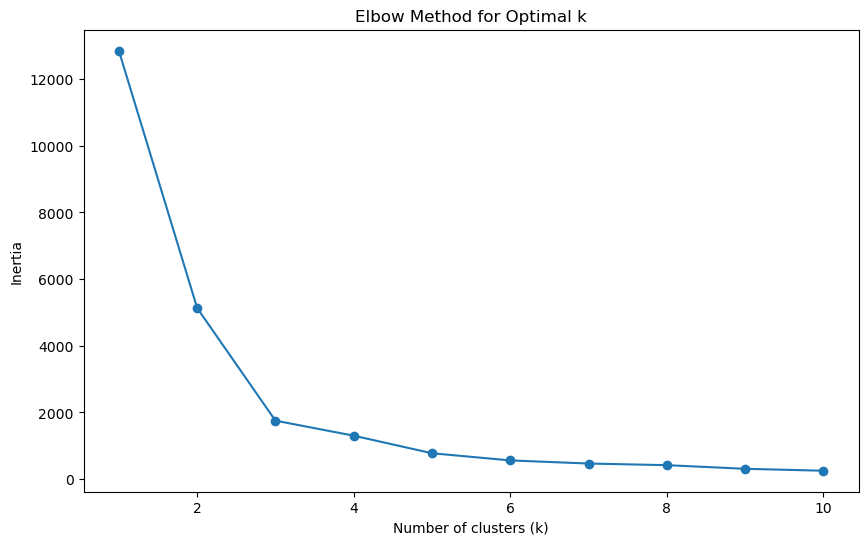

In [55]:
# Elbow method for Optimal k

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm_normalized)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [56]:
optimal_k = 3 # from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_normalized)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=["Recency", "Frequency", "Monetary"])
print("Cluster Centers: ")
print(cluster_centers_df)

Cluster Centers: 
      Recency      Frequency      Monetary
0   40.162584     117.926822  2.418892e+03
1    0.000000  107927.000000  1.191276e+06
2  239.643068      31.109145  5.336866e+02


#### Visualize the clusters

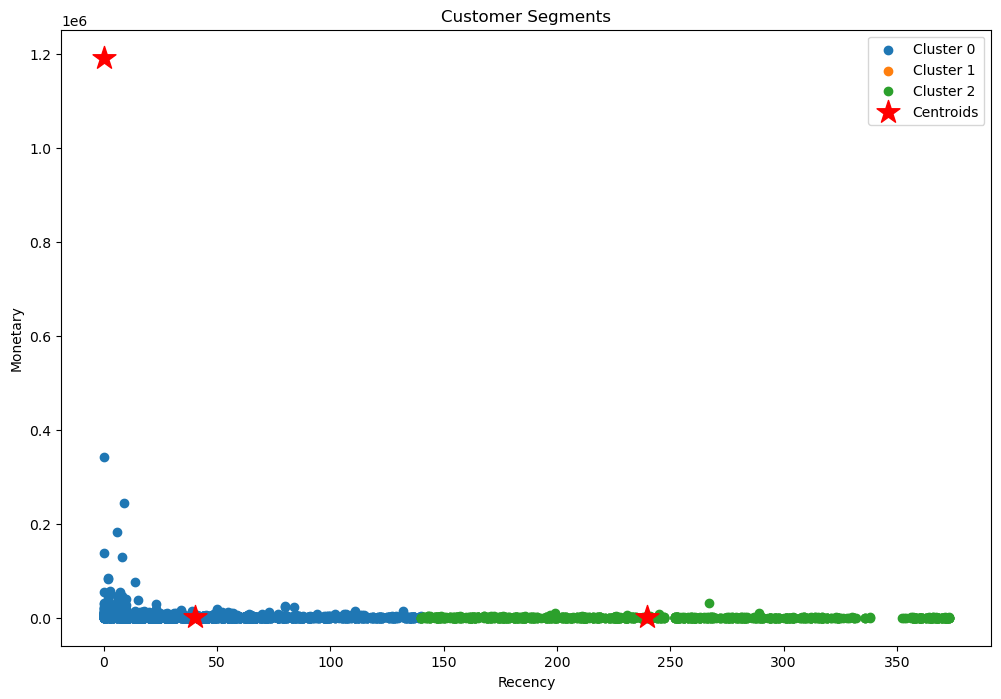

In [57]:
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster = df_rfm[df_rfm['Cluster'] == i]
    plt.scatter(cluster['Recency'], cluster['Monetary'], label=f"Cluster {i}")

plt.scatter(cluster_centers_df['Recency'], cluster_centers_df['Monetary'], \
            marker='*', s=300, c='r', label='Centroids')

plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segments")
plt.legend()
plt.show()

In [60]:
cluster_stats = df_rfm.reset_index().groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Count'})

print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
            Recency      Frequency      Monetary  Count
Cluster                                                
0         40.284404     117.930887  2.418005e+03   3270
1          0.000000  107927.000000  1.191276e+06      1
2        240.037512      30.753208  5.291067e+02   1013
